<a href="https://colab.research.google.com/github/cristiancarcamo-netizen/Portafolio/blob/v2/World_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Uso de la api del banco mundial

La versión 1.0.12 del  paquete wbgapi de Python  ya está disponible. Este paquete lleva casi un año en el  Índice de Paquetes de Python  y la última versión incorpora varias funciones nuevas para que la exploración y la búsqueda en bases de datos sean más sencillas e interactivas.

Los paquetes de Python para datos del Banco Mundial existen desde hace tiempo, pero WBGAPI es relativamente nuevo. Creé este paquete para aprovechar algunas mejoras de la API que también existen desde hace tiempo, pero que eran difíciles de entender o usar, y no contaban con el soporte de otros paquetes. También quería mejorar  la compatibilidad con Pandas  y, en general, facilitar la recuperación de datos sin necesidad de código adicional.

In [1]:
#Instalar biblioteca
%pip install wbgapi

In [2]:
import wbgapi as wb
import wbgapi as wb
import pandas as pd
import numpy as np
from math import ceil


In [3]:
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/CYD economia examen')

import my_func as fn

Mounted at /content/drive


Usando la api del banco mundial es posible acceder a estadisticas diversas sobre el desarrollo economico. a contiuacion extraeremos informacion de 65 indicadores economicos

In [36]:
# Indicadores a consultar
dicc_indicadores = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [37]:
#Descarga de datos
paises_wb_raw = fn.descargar_en_chunks(indicadores=dicc_indicadores, años= 2023,chunk_size=15)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS', 'SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS']
Descargando bloque 2: ['SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS', 'SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 3: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN', 'GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS']
Descargando bloque 4: ['EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE.AR5', 'SE.PRM.NENR', '

## Análisis exploratorio de datos

In [38]:
paises_wb_raw.tail(10)

,country,Country,NY.GDP.MKTP.PP.KD,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
256,EMU,Euro area,1.959542e+13,46.577215,1.721439e+08,0.455467,3.502927e+08,1.788136e+08,51.046897,1.714792e+08,...,91.519157,72.876457,84.761515,82.192008,79.751890,NaN,NaN,NaN,NaN,NaN
257,TEA,East Asia & Pacific (IDA & IBRD countries),4.167600e+13,44.165052,1.124207e+09,0.183863,2.111139e+09,1.042418e+09,49.377060,1.068721e+09,...,65.713387,56.121181,78.875306,75.908564,73.119271,NaN,NaN,NaN,NaN,76.5
258,EAP,East Asia & Pacific (excluding high income),4.172794e+13,44.228065,1.141781e+09,0.185777,2.137528e+09,1.055765e+09,49.391857,1.081763e+09,...,65.068619,55.855450,78.835818,75.880683,73.099330,NaN,NaN,NaN,NaN,75.9
259,EAS,East Asia & Pacific,5.488315e+13,44.319424,1.278827e+09,0.202813,2.384479e+09,1.181275e+09,49.540153,1.203205e+09,...,66.535133,57.708241,79.634579,76.659518,73.855544,NaN,NaN,NaN,NaN,77.5
260,EAR,Early-demographic dividend,4.132594e+13,32.435763,1.430000e+09,1.173354,3.511608e+09,1.730506e+09,49.279606,1.781101e+09,...,37.509548,33.652882,73.913864,71.796245,69.784434,NaN,NaN,NaN,NaN,NaN
261,CEB,Central Europe and the Baltics,4.224592e+12,45.669942,4.909698e+07,0.103859,1.001759e+08,5.163534e+07,51.544691,4.854052e+07,...,80.939987,56.712559,81.624679,77.896784,74.354344,NaN,NaN,NaN,NaN,NaN
262,CSS,Caribbean small states,1.333323e+11,43.965332,1.919128e+06,0.501131,4.519904e+06,2.293907e+06,50.751230,2.225997e+06,...,NaN,NaN,76.456921,73.171645,69.986624,NaN,NaN,NaN,NaN,NaN
263,ARB,Arab World,8.076341e+12,19.141318,1.324834e+08,2.255866,4.821060e+08,2.327028e+08,48.267971,2.494032e+08,...,34.757931,31.807100,74.418910,72.444678,70.619437,NaN,NaN,NaN,NaN,NaN
264,AFW,Africa Western and Central,2.482181e+12,46.355771,2.120222e+08,2.386204,5.093986e+08,2.528994e+08,49.646669,2.564992e+08,...,NaN,NaN,59.997102,58.855722,57.752356,NaN,NaN,NaN,NaN,38.1
265,AFE,Africa Eastern and Southern,2.963096e+12,47.278110,2.884824e+08,2.520818,7.505038e+08,3.790257e+08,50.502844,3.714780e+08,...,NaN,NaN,67.914779,65.146291,62.395547,NaN,NaN,NaN,NaN,32.4


Al revisar los primeros y ultimos registros se observa que la extraccion de datos contiene datos de paises y agrupaciones economicas. Por lo tanto se procede a la limpieza de datos

In [39]:
# Seleccionar solamente paises usando código ISO
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [40]:
#Seleccionar solamente paises.
paises_wb_raw = paises_wb_raw[paises_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

In [41]:
paises_wb_raw.tail()

,country,Country,NY.GDP.MKTP.PP.KD,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
192,AGO,Angola,2.664516e+11,49.450638,15430003.0,3.080655,36749906.0,18568216.0,50.525887,18181690.0,...,9.933616,10.165600,67.144,64.617,62.099,NaN,NaN,NaN,NaN,44.7581
193,AND,Andorra,5.225828e+09,NaN,NaN,1.433748,80856.0,39502.0,48.854754,41354.0,...,68.003820,57.193764,86.107,84.041,82.100,NaN,NaN,NaN,NaN,95.4456
194,DZA,Algeria,6.998184e+11,16.830056,13174228.0,1.498976,46164219.0,22614984.0,48.988123,23549235.0,...,67.258843,44.258295,77.696,76.261,74.895,NaN,NaN,NaN,NaN,76.9081
195,ALB,Albania,4.940567e+10,44.994454,1376643.0,-1.148418,2745972.0,1388342.0,50.559226,1357630.0,...,77.031527,52.749937,81.446,79.602,77.728,NaN,NaN,81.7239,84.59,83.1356
196,AFG,Afghanistan,8.223848e+10,6.846247,8866507.0,2.135594,41454761.0,20530683.0,49.525513,20924078.0,...,NaN,NaN,67.536,66.035,64.467,NaN,NaN,NaN,NaN,17.7089


Una vez seleccionado solamente los paises procederemos al analisis exploratorio de datos.

In [42]:
paises_wb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  197 non-null    object 
 1   Country                  197 non-null    object 
 2   NY.GDP.MKTP.PP.KD        197 non-null    float64
 3   SL.TLF.TOTL.FE.ZS        173 non-null    float64
 4   SL.TLF.TOTL.IN           173 non-null    float64
 5   SP.POP.GROW              197 non-null    float64
 6   SP.POP.TOTL              197 non-null    float64
 7   SP.POP.TOTL.FE.IN        197 non-null    float64
 8   SP.POP.TOTL.FE.ZS        197 non-null    float64
 9   SP.POP.TOTL.MA.IN        197 non-null    float64
 10  SP.POP.TOTL.MA.ZS        197 non-null    float64
 11  SP.RUR.TOTL              196 non-null    float64
 12  SP.RUR.TOTL.ZG           188 non-null    float64
 13  SP.RUR.TOTL.ZS           196 non-null    float64
 14  SP.URB.GROW              1

Existen variables con un alto volumen de datos faltantes. Usaremos la siguiente regla para el tratamiento de los mismos:
- Si 'NaN' > 10% Se procede a eliminar la variable.
- Si 'NaN' < 10% Se procede a imputar datos.

In [43]:
#Condicion booleaba
mask_bool= paises_wb_raw.isna().mean()>0.10
#Seleccion de columnas nulas
drop_columns = list(paises_wb_raw.isna().mean()[mask_bool].index)
#eliminar columnas con alto porcentaje de nulos
paises_wb_raw = paises_wb_raw.drop(columns= drop_columns)

# A continuacion revisaremos la cantidad de datos de nuestro DataFrame

In [44]:
print(f'El dataframe contiene {paises_wb_raw.shape[0]} filas y {paises_wb_raw.shape[1]} columnas, de las cuales {len(paises_wb_raw.isna().sum()[paises_wb_raw.isna().mean()>0].index)} contienen registros nulos bajo el 10%')

El dataframe contiene 197 filas y 27 columnas, de las cuales 15 contienen registros nulos bajo el 10%


## Imputacion de datos

Se realizara a modo de prueba una imputacion parametrica a fin de aplicar algoritmo de reduccion de dimensionalidad

In [45]:
from numpy import mean

In [55]:
paises_wb=paises_wb_raw

In [59]:
# Guardar nombre de paises como indice
paises_wb.index = paises_wb_raw['Country']

In [60]:
#E Eliminar columnas de texto
paises_wb= paises_wb.drop(columns= ['country','Country'])

In [61]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
paises_wb = pd.DataFrame(imputer.fit_transform(paises_wb),columns =paises_wb.columns,index=paises_wb.index)

In [62]:
paises_wb.isna().sum()

,0
NY.GDP.MKTP.PP.KD,0
SP.POP.GROW,0
SP.POP.TOTL,0
SP.POP.TOTL.FE.IN,0
SP.POP.TOTL.FE.ZS,0
SP.POP.TOTL.MA.IN,0
SP.POP.TOTL.MA.ZS,0
SP.RUR.TOTL,0
SP.RUR.TOTL.ZG,0
SP.RUR.TOTL.ZS,0


In [63]:
print(f'El dataframe contiene {paises_wb.shape[0]} filas y {paises_wb.shape[1]} columnas, de las cuales {len(paises_wb.isna().sum()[paises_wb.isna().mean()>0].index)} contienen registros nulos.')

El dataframe contiene 197 filas y 25 columnas, de las cuales 0 contienen registros nulos.


In [71]:
paises_wb.head()

,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.RUR.TOTL,SP.RUR.TOTL.ZG,SP.RUR.TOTL.ZS,...,BX.KLT.DINV.WD.GD.ZS,GE.EST,NV.IND.TOTL.CD,NV.IND.TOTL.CN,NV.SRV.TOTL.CD,NV.SRV.TOTL.CN,EN.GHG.CO2.IP.MT.CE.AR5,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN
Country,,,,,,,,,,,,,,,,,,,,,
Zimbabwe,5.624918e+10,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,11027277.0,1.496477,67.483,...,1.583455,-1.170335,9.266224e+09,1.407335e+10,2.198816e+10,3.339515e+10,0.756300,65.013,62.775,60.226
Zambia,7.612916e+10,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,11121516.0,1.730151,53.665,...,0.311507,-0.658970,9.682008e+09,1.956929e+11,1.566890e+10,3.167001e+11,1.457500,68.673,66.349,63.936
West Bank and Gaza,2.769440e+10,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,1158063.0,1.103502,22.418,...,0.580098,-1.209557,1.483189e+11,3.655149e+14,3.645983e+11,4.802635e+14,16.837712,71.502,65.170,59.691
Viet Nam,1.359364e+12,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,60733147.0,-0.501440,60.520,...,4.264071,0.126467,1.630505e+11,3.878535e+15,1.834968e+11,4.364896e+15,49.319000,79.264,74.588,69.877
Vanuatu,9.991622e+08,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,237180.0,2.109109,74.024,...,0.822910,-0.568605,1.483189e+11,3.655149e+14,3.645983e+11,4.802635e+14,0.001000,73.927,71.477,69.445


In [72]:
y = paises_wb['NY.GDP.MKTP.PP.KD']
x = paises_wb.drop(columns='NY.GDP.MKTP.PP.KD')

## Reduccion de dimensionalidad

- En que consiste la reduccion de diensionalidad


In [26]:
# Importar biliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from scipy.stats import chi2

In [64]:
paises_wb.head()

,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.RUR.TOTL,SP.RUR.TOTL.ZG,SP.RUR.TOTL.ZS,...,BX.KLT.DINV.WD.GD.ZS,GE.EST,NV.IND.TOTL.CD,NV.IND.TOTL.CN,NV.SRV.TOTL.CD,NV.SRV.TOTL.CN,EN.GHG.CO2.IP.MT.CE.AR5,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN
Country,,,,,,,,,,,,,,,,,,,,,
Zimbabwe,5.624918e+10,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,11027277.0,1.496477,67.483,...,1.583455,-1.170335,9.266224e+09,1.407335e+10,2.198816e+10,3.339515e+10,0.756300,65.013,62.775,60.226
Zambia,7.612916e+10,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,11121516.0,1.730151,53.665,...,0.311507,-0.658970,9.682008e+09,1.956929e+11,1.566890e+10,3.167001e+11,1.457500,68.673,66.349,63.936
West Bank and Gaza,2.769440e+10,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,1158063.0,1.103502,22.418,...,0.580098,-1.209557,1.483189e+11,3.655149e+14,3.645983e+11,4.802635e+14,16.837712,71.502,65.170,59.691
Viet Nam,1.359364e+12,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,60733147.0,-0.501440,60.520,...,4.264071,0.126467,1.630505e+11,3.878535e+15,1.834968e+11,4.364896e+15,49.319000,79.264,74.588,69.877
Vanuatu,9.991622e+08,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,237180.0,2.109109,74.024,...,0.822910,-0.568605,1.483189e+11,3.655149e+14,3.645983e+11,4.802635e+14,0.001000,73.927,71.477,69.445


In [74]:
# Escalar datos
scaler = StandardScaler()
x_std = scaler.fit_transform(x)
x_std = pd.DataFrame(x_std, columns=x.columns)

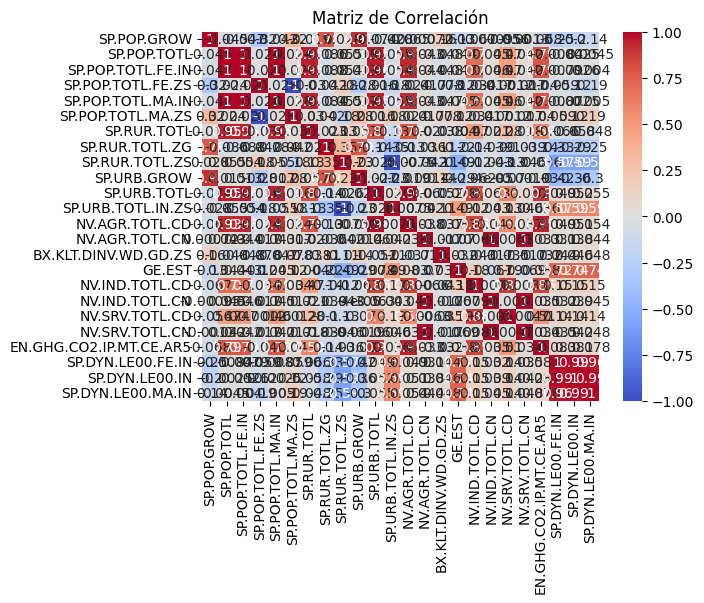

In [75]:
corr = x_std.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [76]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_std)

pca.explained_variance_ratio_


array([3.10513293e-01, 2.12378415e-01, 1.25469644e-01, 1.19107092e-01,
       6.10398543e-02, 4.77577306e-02, 4.30888894e-02, 3.63242735e-02,
       1.78872811e-02, 1.44863007e-02, 6.82224012e-03, 2.48199439e-03,
       1.10887998e-03, 9.38307236e-04, 3.56745609e-04, 1.99506035e-04,
       1.91885953e-05, 8.71606688e-06, 4.94922285e-06, 3.75061324e-06,
       2.94849612e-06, 1.21869303e-30, 7.39276591e-34, 4.42492735e-34])

In [77]:
np.sum([3.10513293e-01, 2.12378415e-01, 1.25469644e-01, 1.19107092e-01,
       6.10398543e-02])

np.float64(0.8285082983000001)

In [78]:
# Seleccionar 2 componentes
pca_2 = PCA(n_components=5)
data_pca = pca_2.fit_transform(x_std)

df_pca = pd.DataFrame(data_pca, columns=['CP1', 'CP2','CP3','CP4','CP5'])
df_pca.head()


,CP1,CP2,CP3,CP4,CP5
0,-1.033409,-3.404570,-0.217140,-1.008690,-0.353097
1,-0.884037,-2.562731,0.087278,0.700855,-0.584654
2,-0.724580,-1.614250,0.239989,0.420674,-0.115606
3,0.913208,-0.552952,1.275756,-0.903786,-0.247103
4,-0.809347,-1.989778,0.165450,0.582093,-0.461104


In [70]:
# Matriz de correlación de las componentes
df_pca.corr()

,CP1,CP2,CP3,CP4,CP5
CP1,1.000000e+00,-3.391525e-17,2.707926e-17,8.144955e-17,3.362153e-16
CP2,-3.391525e-17,1.000000e+00,1.325420e-15,-7.824259e-17,-1.189624e-16
CP3,2.707926e-17,1.325420e-15,1.000000e+00,2.072714e-16,-9.195921e-17
CP4,8.144955e-17,-7.824259e-17,2.072714e-16,1.000000e+00,2.658555e-16
CP5,3.362153e-16,-1.189624e-16,-9.195921e-17,2.658555e-16,1.000000e+00


## Modelos de clasificacion